### Q1 (5 points). P-values and hypothesis testing
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.02, 0.1, 3e-15, 0.04, 0.001, 0.06, 0.03
For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

#### Answer

The answer depends on the level of confidence chosen for the study, or the alpha threshold. For example, if the chosen level of confidence is 95% ($\alpha = 0.5$), I would reject the Null Hypothesis for those regressors with p-value equal or lower than $\alpha$. In this case those regressors would be the **5** ones with p-values: 0.02, 3e-15, 0.04, 0.001, 0.03. 

### Q2 (5 points). Confidence intervals
Assume we perform a regression and get an estimate 10 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 95%-confidence interval is [-5, 5] **CAN'T BE TRUE**

b. 99%-conficence interval is [9.99,10.01]

c. 95%-confidence interval is [9,100] **CAN'T BE TRUE**

c. 99%-confidence interval is [8, 12], while 95%-confidence interval is [9, 11].

Explain your choices

*Option a* doesn't contain the estimate within the confidence interval. *Option b* contains the estimate and the confidence interval is plus or less 0.01 . *Option c* while the confidence interval contains the estime, there are different values within the interval below (1 unit) the estimate and above it (90 units). *Option d* the confidence interval contains the estimate, and as the confidence level grows, the interval diminishes (from plus or less two units to one unit) as expected.

### Q3.(Car Price Example, 20pts)
You are given a dataset containing the information regarding car prices:
'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls'  

**VARIABLE DESCRIPTIONS:** (Data was collected in 2005)
* Price: suggested retail price of the used 2005 GM car in excellent condition. The condition of a car can greatly affect price. All cars in this data set were less than one year old when priced and considered to be in excellent condition. 
* Mileage: number of miles the car has been driven
* Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
* Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
* Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
* Type: body type such as sedan, coupe, etc.
* Cylinder: number of cylinders in the engine	
* Liter: a more specific measure of engine size	
* Doors: number of doors	
* Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
* Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
* Leather: indicator variable representing whether the car has leather seats (1 = leather)
  
Run the regression modeling the price through all the features above except 'Model","Trim" and "Type" and analyse its statistics. Based on the results suppose there's a price X you have to pay for each additional Liter of your tank capacity, then:
* (a) What's the expected price E(X)?  
* (b) What's the probability that X > \$4500?  
* (c) What's the two-sided 90% confidence interval of X?
* (d) What's the one-sided 90% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$
   

In [198]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


/home/pipe/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
url = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls'
df = pd.read_excel(url)
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [3]:
model = smf.ols(formula = 'Price ~ Mileage + Make + Cylinder + Liter + Doors + Cruise + Sound + Leather',
                data = df).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     479.0
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:19:04   Log-Likelihood:                -7687.0
No. Observations:                 804   AIC:                         1.540e+04
Df Residuals:                     791   BIC:                         1.546e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.572e+04   1289.58

#### (a) What's the expected price E(X)?

In [11]:
print 'For each additional Liter of tank capacity,\
the expected price increase (the remains variables remaining the same)\
is %.1f dollars' % model.params['Liter']

For each additional Liter of tank capacity,the expected price increase (the remains variables remaining the same)is 4760.4 dollars


In [33]:
#(b) What's the probability that X > $4500?
prob4500 = t.sf(4500, df = model.df_resid, loc=model.params['Liter'], scale=model.bse['Liter'])
print 'The probability that X > $4500 is %.2f' % prob4500

The probability that X > $4500 is 0.71


In [17]:
#(c) What's the two-sided 90% confidence interval of X?
t.interval(0.90, df = model.df_resid,
           loc = model.params['Liter'], 
           scale = model.bse['Liter'])  



(4002.9481807923521, 5517.8878655819717)

In [39]:
#(d) What's the one-sided 90% confidence interval of X? Calculate the upper interval  [X0,+∞)
uppCI = t.isf(.10, df = model.df_resid,
           loc = model.params['Liter'], 
           scale = model.bse['Liter'])  

print 'The  one-sided 90 percentupper interval is %.1f' % uppCI

The  one-sided 90 percentupper interval is 5350.4


In [ ]:
sf(x, df, loc=0, scale=1)

### Q4. Dimension reduction using PCA.  (40 pts)

Let's see the handwriting digits data set. This data set includes 1787 digits. And for each digit, we have 64 binary variables x1,x2,...x64, each one representing a pixel on the 8x8 image (1-belongs to an image, 0-blank). The label (y) for each digit image is the actual digit it represents from 0 to 9.  

In [44]:
#Run the following code.
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


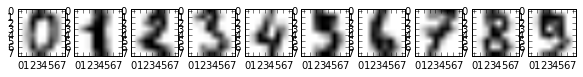

In [45]:
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Let's start our questions. 

#### Part one. We have 64-dimension feature space(exclude y) X.  (5pts+5pts)
a. Assume we need to use PCA to transform X to Xproj.Plot the explained variance for each eigenvector(direction) from high to low in one scatter plot. 

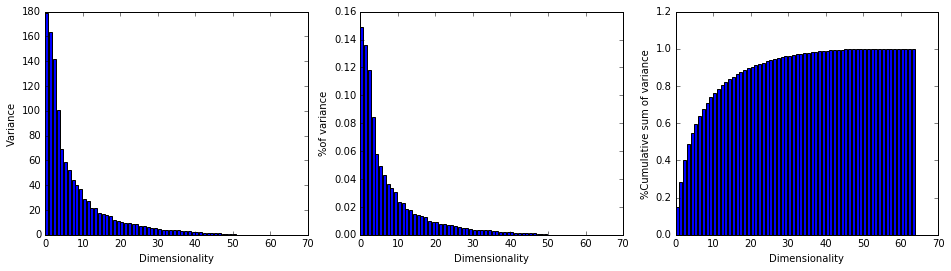

In [85]:
n = 64
pca = PCA(n)
Xproj = pca.fit_transform(X)


eigenvalues = pca.explained_variance_
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)

ax.bar(np.arange(n), eigenvalues);
ax.set_xlabel("Dimensionality")
ax.set_ylabel("Variance")


ratio = pca.explained_variance_ratio_
ax2 = fig.add_subplot(1,3,2)
ax2.bar(np.arange(n), ratio);
ax2.set_xlabel("Dimensionality")
ax2.set_ylabel("%of variance")

sumRatio = np.cumsum(pca.explained_variance_ratio_)
ax3 = fig.add_subplot(1,3,3)
ax3.bar(np.arange(n), sumRatio);
ax3.set_xlabel("Dimensionality")
ax3.set_ylabel("%Cumulative sum of variance")



b. What is the total variance of X? How many eigenvectors(directions) do we need to choose if we want to preserve 90% variance of the original data.


In [91]:
totalVar = np.sum(np.var(X,0))
print 'Total variance of X: %.2f' %totalVar

eigenvectorCumsum90 = 64 - sum(np.cumsum(pca.explained_variance_ratio_) >= .90)
print 'To preserve 90% percent of the variance we need to keep {:d} eigenvectors'.format(eigenvectorCumsum90)

Total variance of X: 1201.48
To preserve 90% percent of the variance we need to keep 20 eigenvectors


#### Part two. Let's use PCA to reduce the dimensionality of digits data set from 64 to 3. And then  visulize the transformed space on a 3 dimensional plot. Please color the points with respect to their label y. (10 pts)



[]

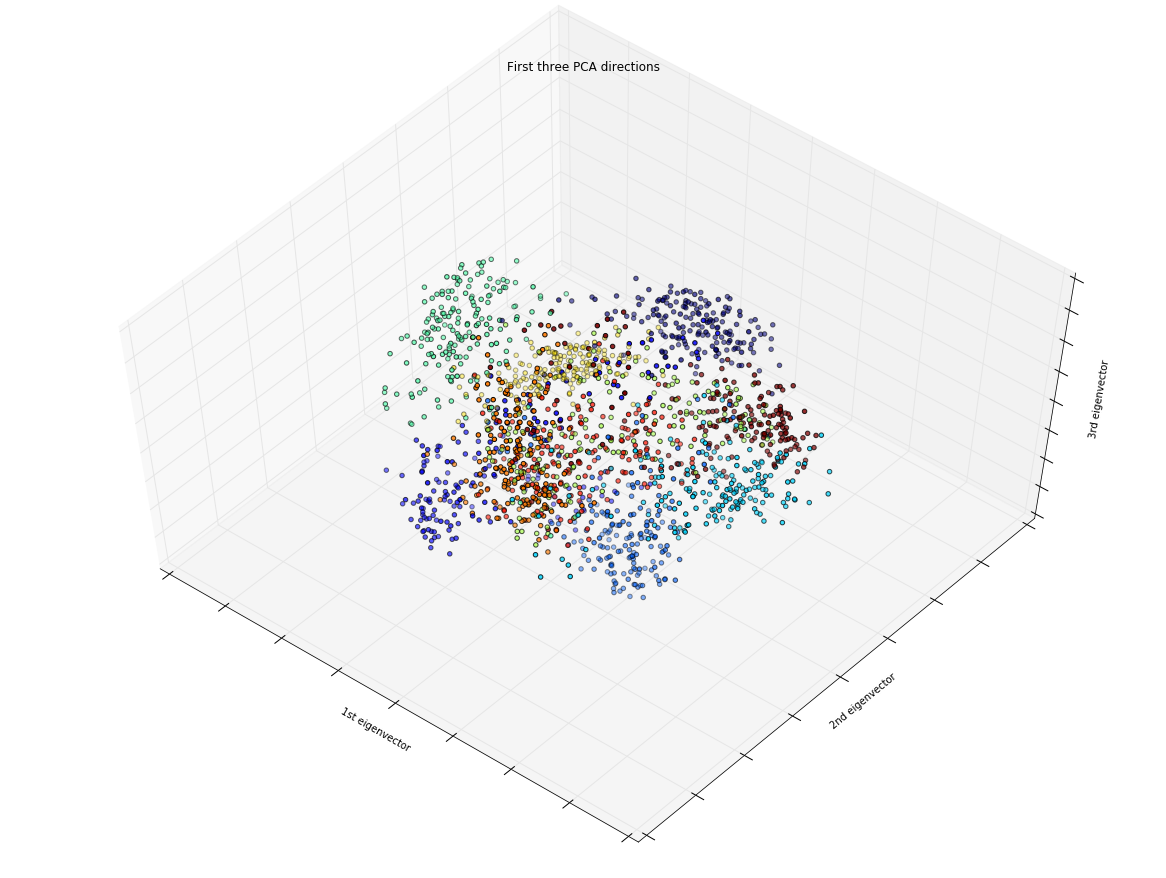

In [112]:
n = 3
pca = PCA(n)
Xproj = pca.fit_transform(X)

fig = plt.figure(figsize=(16,12))

ax2 = fig.add_subplot(1,2,2)
ax2 = Axes3D(fig, elev=-120, azim=50)
ax2.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=y)
ax2.set_title("First three PCA directions")
ax2.set_xlabel("1st eigenvector")
ax2.w_xaxis.set_ticklabels([])
ax2.set_ylabel("2nd eigenvector")
ax2.w_yaxis.set_ticklabels([])
ax2.set_zlabel("3rd eigenvector")
ax2.w_zaxis.set_ticklabels([])



#### Part three. Take the data for digits 3 and 8 from the origional data set and call it data1. (20pts)


In [115]:
data1 = data.loc[(data.y == 3)|(data.y == 8),:] 
data1.y.value_counts()

3.0    183
8.0    174
Name: y, dtype: int64

a. If we use PCA for dimensionality reduction on data1, how big is the percentage of total variance, that the first and second eigenvectors could explain? 



array([ 0.24812715,  0.11415463])

The percentage of total variance that the first and second eigenvectors could explain is 36.2 percent


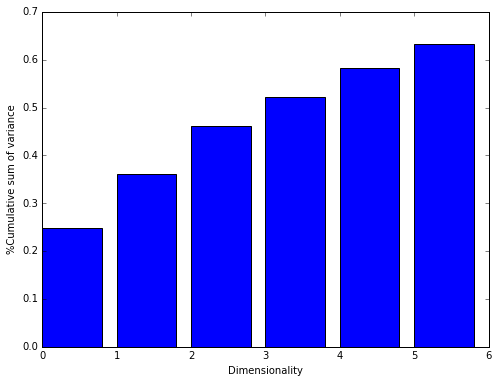

In [150]:
n = 6
X = np.array(data1.copy().drop('y',axis = 1))
pca = PCA(n)
Xproj = pca.fit_transform(X)



fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sumRatio = np.cumsum(pca.explained_variance_ratio_)
ax.bar(np.arange(n), sumRatio);
ax.set_xlabel("Dimensionality")
ax.set_ylabel("%Cumulative sum of variance")
print 'The percentage of total variance that the first and second eigenvectors could explain is %.1f percent' % (sumRatio[1]*100)

b. Now let's visulize the dimensional feature space of data1 by the first two eigenvectors. Color your points according to the digits they represent.

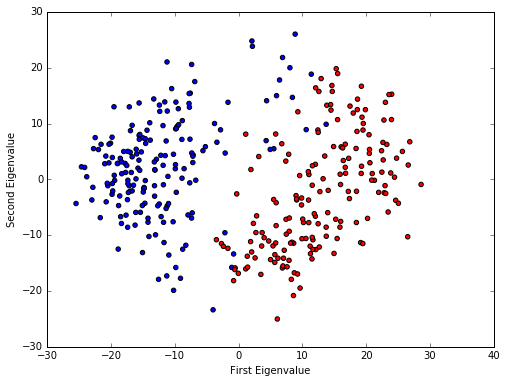

In [153]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(Xproj[:, 0], Xproj[:, 1], c=data1.y,cmap=plt.cm.bwr)
ax.set_xlabel('First Eigenvalue')
ax.set_ylabel('Second Eigenvalue')



c. Visulize the feature space using third and fourth eigenvectors(directions).

d. Visulize the feature space using the last two eigenvectors(directions).


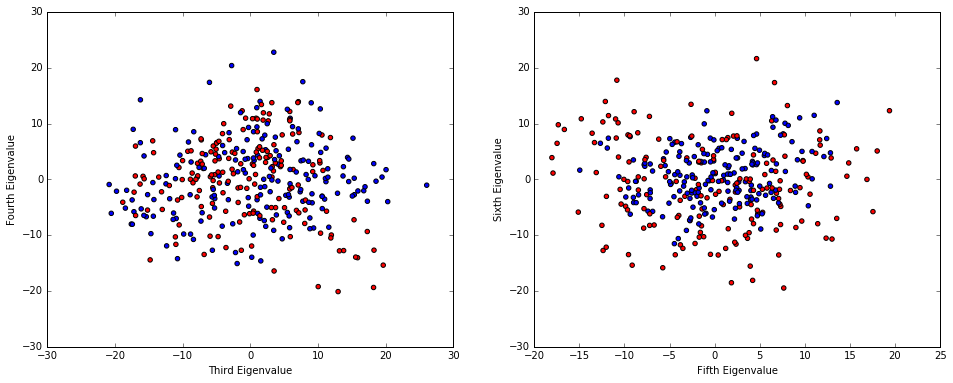

In [154]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
ax.scatter(Xproj[:, 2], Xproj[:, 3], c=data1.y,cmap=plt.cm.bwr)
ax.set_xlabel('Third Eigenvalue')
ax.set_ylabel('Fourth Eigenvalue')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(Xproj[:, 4], Xproj[:, 5], c=data1.y,cmap=plt.cm.bwr)
ax2.set_xlabel('Fifth Eigenvalue')
ax2.set_ylabel('Sixth Eigenvalue')


##### Q5. (30 pts)

In [251]:
data=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474//ADS_Data/session06/data_hw_3_4.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


#### A. Run a linear regression : Y~x1+..+x15 (without constant) and report the summary of this regression result. (5pts)

In [252]:
n = 15
formula = 'Y ~ x1'
for i in data.columns[2:]:
    formula = formula +'+'+  i 

model = smf.ols(formula = formula + '-1', data = data).fit()
print model.summary()



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     7.682
Date:                Wed, 19 Oct 2016   Prob (F-statistic):           3.73e-07
Time:                        19:27:15   Log-Likelihood:                -64.562
No. Observations:                  50   AIC:                             159.1
Df Residuals:                      35   BIC:                             187.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3026      1.692      1.951      0.0

#### B. Demonstrate the overfitting problem by 1000 times cross-validation.  Report average OS and IS R-squared.  (10 pts)

In [253]:
R_IS=[]
R_OS=[]

nCross=1000
x = np.array(data.drop('Y',axis=1).copy())
y = np.array(data.Y.copy())

from sklearn.linear_model import LinearRegression

for i in range(nCross):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(nCross,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(nCross,np.mean(R_OS)))

IS R-squared for 1000 times is 0.804787507881
OS R-squared for 1000 times is 0.290705350589


#### C. Repeat A and B on features after feature selection(p value<0.05). (5pts)

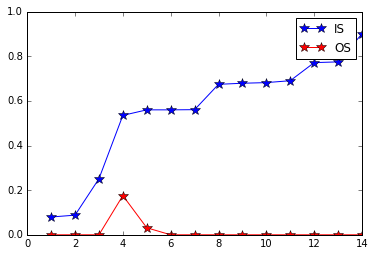

In [254]:
def AdjR2(flag,data):
    '''
    Evalute the model with adjusted R-squared,
    with flag indicating the feature selection
    1--feature included
    0--feature excluded
    '''
    sampleSplit = len(data.index)/2
    formstr='Y~-1'
    for i in range(len(flag)):
        if flag[i]==1:
            formstr += '+x%d'%(i+1) # Construct the regression formula based on flag
    train = data[:sampleSplit]
    valid = data[sampleSplit:]
    lm = smf.ols(formula = formstr, data = train).fit()
    lmy = lm.predict(valid)
    y_err = lmy-valid.Y
    y_norm = valid.Y-np.mean(valid.Y)
    # Adjusted R^2
    R2 = 1 - y_err.dot(y_err) / y_norm.dot(y_norm) * (n-1) / (n-sum(flag)-1)
    return R2, lm

n = 15
adjR2 = []
regR2 = []

for i in range(1, n):
    a,b = AdjR2([1]*i + [0]*(n-i),data)
    regR2.append(b.rsquared)
    if a>0:
        adjR2.append(a)
    else:
        adjR2.append(0)
        
plt.plot(range(1, n), regR2, 'b-*', markersize = 10,label="IS")
# Out of sample R2 (adjusted)
plt.plot(range(1, n), adjR2, 'r-*', markersize = 10,label="OS")
plt.legend()
plt.show()

The best features appear to be **x4** and **x5**

In [255]:
def FindBestI():
    flag = np.zeros(n)    # initially exclude all regressors: 1-include, 0-exclude
    r2max = 0             # for storing and compare with best R^2
    while True:
        flag_mat = np.maximum(np.eye(n),flag)
        # see if R2 increases if we add one more feature
        r2 = np.apply_along_axis(AdjR2,1,flag_mat,data)[:,0]  # 1: row-wise operation, then select R2 only
        temp = r2.max()
        if temp > r2max:
            r2max = temp
            flag = flag_mat[r2.argmax()]  # select this feature if it improves our R2
        else:
            break                         # if there's nothing to add, break the loop
    return flag

flag = FindBestI()             # store the best choice of feature selection
r2_best,lm_best = AdjR2(flag,data)  # then run the regression based on such selection
col = data.columns[1:]
ix = [col[i] for i in range(n) if flag[i]==1]

b = pd.DataFrame({'Pvalues':AdjR2([1]*n,data)[1].pvalues, 'Keeper':col})
c = 'forestgreen'
def highlight_pval(val):
    color = c if val in ix else 'white'
    return 'background-color: %s'%color

b.style.applymap(highlight_pval, subset=['Keeper']).\
    bar(subset = ['Pvalues'], color=c)

This confirms it, that the true model is $Y ~ \beta_1 x4 + \beta_2 x5$

In [256]:
modelSelected = smf.ols(formula = 'Y ~ x4 + x5 -1', data = data).fit()
print modelSelected.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     24.29
Date:                Wed, 19 Oct 2016   Prob (F-statistic):           5.16e-08
Time:                        19:28:22   Log-Likelihood:                -83.504
No. Observations:                  50   AIC:                             171.0
Df Residuals:                      48   BIC:                             174.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x4             0.0377      0.008      5.007      0.0

In [257]:
R_IS=[]
R_OS=[]

nCross=1000
x = np.array(data.loc[:,['x4','x5']].copy())
y = np.array(data.Y.copy())

from sklearn.linear_model import LinearRegression

for i in range(nCross):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(nCross,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(nCross,np.mean(R_OS)))

IS R-squared for 1000 times is 0.486188946749
OS R-squared for 1000 times is 0.380126308988


#### D. Transform the data set by PCA and keep all 15 eigenvectors(directions). Call the new data set after transformation Xproj. And repeat questions A and B using Xproj. (10 pts)

In [260]:
X = np.array(data.copy().drop('Y',axis = 1))
pca = PCA(n)
Xproj = pca.fit_transform(X)

dataPCA = pd.DataFrame(Xproj)
dataPCA.columns = data.columns[1:]
dataPCA['Y'] = data.Y
dataPCA.head()


model = smf.ols(formula = formula + '-1', data = dataPCA).fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 19 Oct 2016   Prob (F-statistic):           5.31e-09
Time:                        19:29:03   Log-Likelihood:                -57.896
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      35   BIC:                             174.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0200      0.004      5.321      0.0

In [261]:
R_IS=[]
R_OS=[]

nCross=1000
x = Xproj
y = np.array(data.Y.copy())

from sklearn.linear_model import LinearRegression

for i in range(nCross):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(nCross,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(nCross,np.mean(R_OS)))

IS R-squared for 1000 times is 0.855005766008
OS R-squared for 1000 times is 0.421107706761


While the original model drops from a mean IS R-squared of 80.47% to a mean OS R-squared 27.07%, after features selection goes from 48.61% to 38,01% respectively. Finally for principal components as regressors te mean IS R-squared is 85.5% and for the OS the mean R-squared is 42,1%, the highest. 



## Extra-credit assignment 

### EC1 (20 points) "Real" out of sample test. 

Review the cross-validation process of last question carefully, you will find the cross-validation is somehow "fake". The reason is that we accessed the information of validation set when we apply PCA on the whole data set.(You should know why). Redo the cross-validation part for question D in previous question. Run 100 times "real" cross-validation and report OS and IS R-squared. 

Hint: for each loop, split the data set to train and validation set, and using PCA only on training set to find the siginificant eigenvectors(directions), and then transform the test data the same way and pick the same eigenvectors for regression.    

### EC2. When PCA could not work?  (20 points). 

Generate a 2 dimensional feature space with labels to show PCA does not work in the case you made. Plot your data set and explain your reason. This is an open question. Any data set which have two dimensional feature space with good explaination why PCA does not work should be fine.

### EC3.(Multiple choice, 5pts. Please add short explaination)
Suppose you have two different feature selection choices A and B, and we have already separated the dataset into training set and validation set. Now we want to use "out-of-sample" $R^2$ to evaluate the model prediction power. The regular $R^2$ and adjusted $R^2$ are denoted as $R_A^2$($R_B^2$) and $adR_A^2$ ($adR_B^2$), respectively. Select all statements that are true: 

A. For each selection, we always have $R_A^2 > adR_A^2$ and $R_B^2 > adR_B^2$  
B. For each selection, we may have $R_A^2 < adR_A^2$ or $R_B^2 < adR_B^2$  
C. If $R_A^2 > R_B^2$ then $adR_A^2$ must be greater than $adR_B^2$, vice versa  
D. If $R_A^2 > R_B^2$, $adR_A^2$ still can be less than $adR_B^2$, vice versa  